In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("IceCream.csv")
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


Text(0, 0.5, 'Revenue')

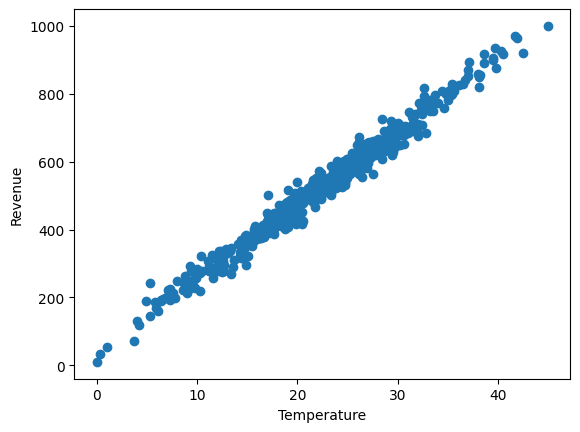

In [3]:
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel("Temperature")
plt.ylabel("Revenue")

In [4]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [5]:
X = df[['Temperature']]
type(X)

pandas.core.frame.DataFrame

In [6]:
y = df['Revenue']
type(y)

pandas.core.series.Series

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [9]:
print("Slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Slope: [21.37416109]
Intercept: 46.910784750530524


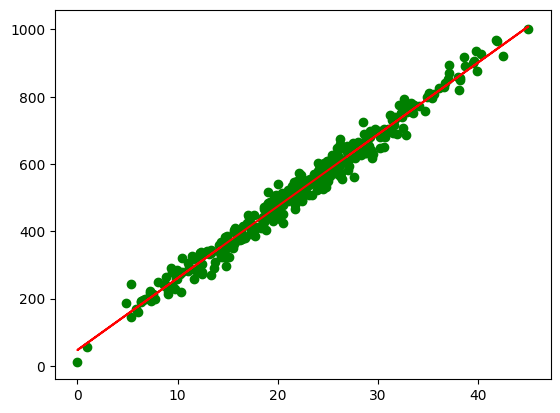

In [10]:
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, regression.predict(X_train), color='red')

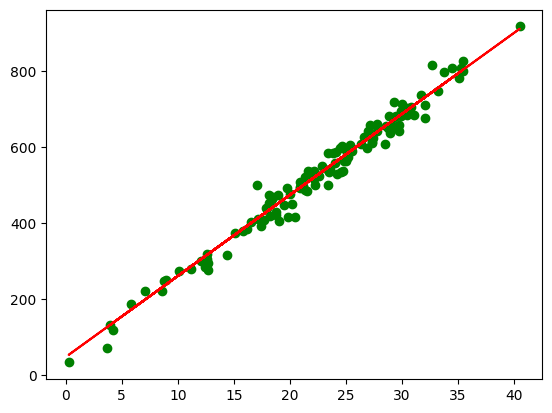

In [11]:
y_pred = regression.predict(X_test)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red')

In [12]:
# Performance Evaluation
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.977546278174417

In [13]:
new_data = pd.DataFrame({"Temperature": [20, 23, 13, 30]})
new_pred = regression.predict(new_data)
new_data["Predictions"] = np.around(new_pred, 2)
new_data

,Temperature,Predictions
0,20,474.39
1,23,538.52
2,13,324.77
3,30,688.14


## Exercise 2

Implement Multiple Linear Regression model that is built on the Startup dataset with four independent variables namely R&D Spend, Administration, Marketing Spend and State and the dependent variable Profit.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
# Drop unnecessary columns (state)
df.drop(
    labels = ["State"],
    axis = 'columns',
    inplace = True
)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [17]:
# Checking for null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

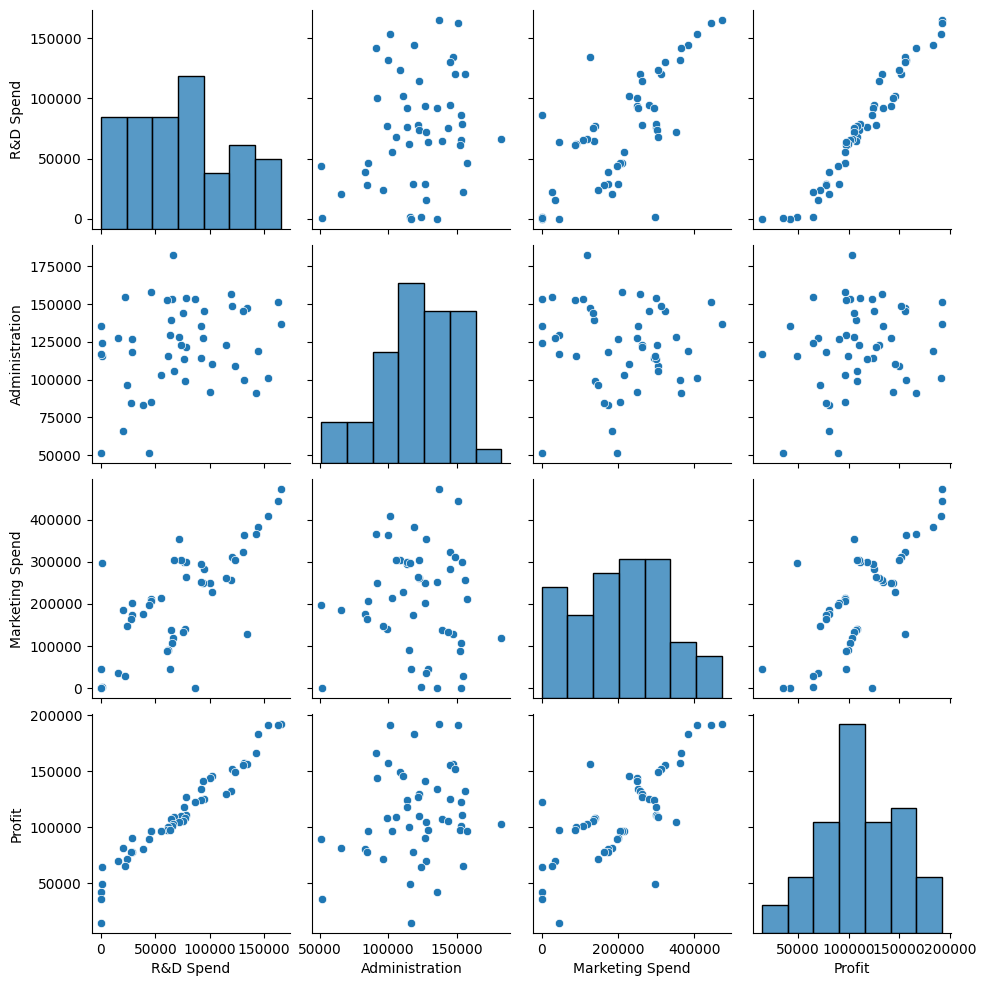

In [18]:
# Visualization
import seaborn as sns
sns.pairplot(data=df)

In [19]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [20]:
# Dropping administration column as well
df.drop(labels=["Administration"], axis='columns', inplace=True)
df.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import r2_score

y_pred = regression.predict(X_test)
score = r2_score(y_test, y_pred)
"%0.2f%%" % (score * 100)

'91.68%'

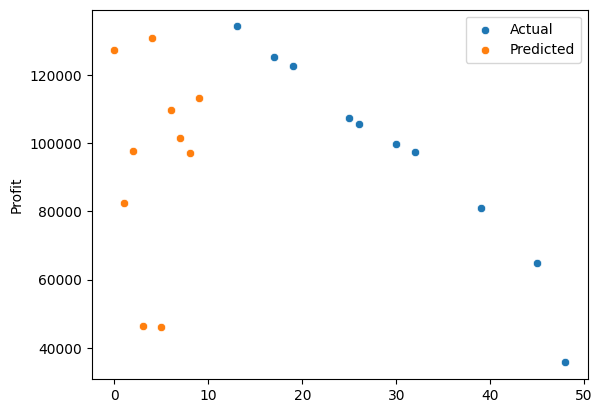

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(y_test, ax=ax, label="Actual")
sns.scatterplot(y_pred, ax=ax, label="Predicted")
ax.legend()

<AxesSubplot: xlabel='R&D Spend', ylabel='Marketing Spend'>

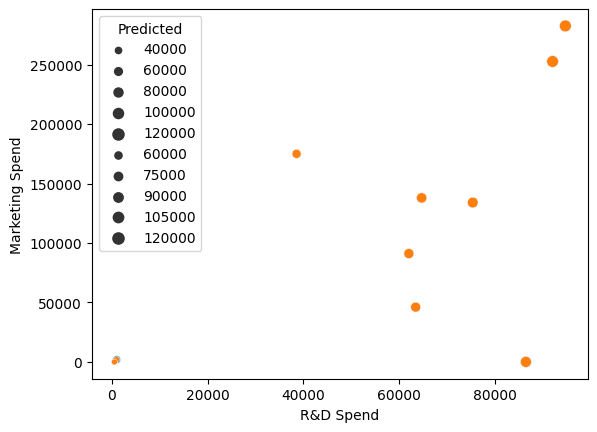

In [24]:
y_pred = pd.Series(y_pred, name="Predicted", index=y_test.index.values)
test_data = X_test.join([y_test,y_pred])

sns.scatterplot(data=test_data, x='R&D Spend', y='Marketing Spend', size='Profit')
sns.scatterplot(data=test_data, x='R&D Spend', y='Marketing Spend', size='Predicted')